In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from _funcs import *

def fermi(e, mu, T):
    return 1/(np.exp((e-mu)/T)+1)

In [102]:
T = 1
mu = 0.5*T
e = 0.5*T
j = 0.01*T
gamma  = 0.1*T
Gamma = 1

f = fermi(e, mu, T)

c = destroy(2)
nc = c.dag()*c

H = identity(2)
c_ops = [Gamma * nc, np.sqrt(gamma * (1-f)) * c, np.sqrt(gamma * f) * c.dag()]

rho0 = fock_dm(2, 0)

dt = 0.001
tf = 15
t = np.arange(0, tf, dt)


In [109]:
# number of chargers to truncate at 
Nm = 20
dN = 0.05
N_cutoff = 10
N = np.arange(-2, Nm, dN)

# ------ Solve n-resolved method with absorbing boundary conditions ------ #
diff = DiffusiveEvolutionPntAbsorb(H, c_ops, 1, t, N, N_cutoff, kind='single')
Pn_vec = diff.solve(rho0)

Converting initial state to vector form


Evolution Superoperator: 100%|██████████| 14999/14999 [00:37<00:00, 396.84it/s]


In [104]:
# Compute survival probability from analytic solution
P0 = np.sum(Pn_vec, axis=0)
dGt = -np.gradient(P0, dt)
dGt2 = -np.gradient(dGt, dt)

# get zero crossings by looking for changes in the sign of difference
zero_crossings = np.where(np.diff(np.sign(dGt2)))[0]
zero_crossings = zero_crossings[np.where(t[zero_crossings] > 0.1)]


# Compute mean and variance of distribution
Et = np.sum(dGt * t)*dt
Var = np.sum(dGt * t**2 )*dt - Et**2


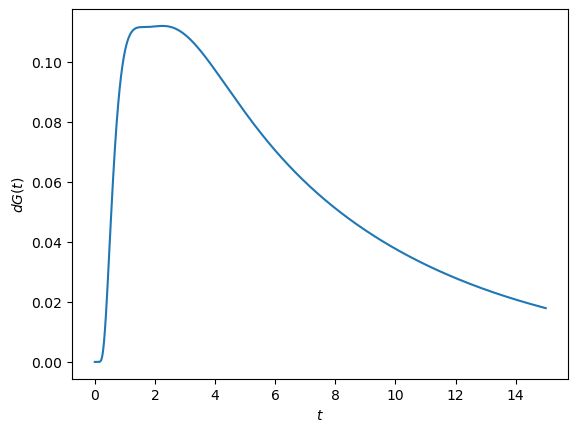

In [105]:
plt.plot(t, dGt)
plt.xlabel(r'$t$')
plt.ylabel(r'$dG(t)$')


plt.show()

In [106]:
result = smesolve(H, rho0, t, c_ops = c_ops[1:], sc_ops=[c_ops[0]], e_ops=[nc], store_measurement=True, ntraj=100)

10.0%. Run time:   0.74s. Est. time left: 00:00:00:06
20.0%. Run time:   1.50s. Est. time left: 00:00:00:05
30.0%. Run time:   2.25s. Est. time left: 00:00:00:05
40.0%. Run time:   2.99s. Est. time left: 00:00:00:04
50.0%. Run time:   3.75s. Est. time left: 00:00:00:03
60.0%. Run time:   4.49s. Est. time left: 00:00:00:02
70.0%. Run time:   5.23s. Est. time left: 00:00:00:02
80.0%. Run time:   5.97s. Est. time left: 00:00:00:01
90.0%. Run time:   6.71s. Est. time left: 00:00:00:00
Total run time:   7.44s


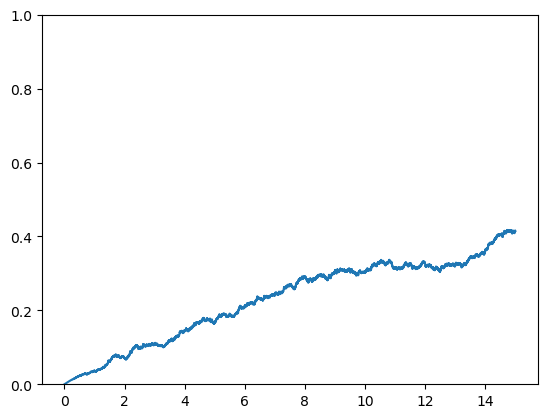

In [108]:
nce = result.expect[0]

plt.plot(t, nce)
# plt.plot(t, -dt*np.cumsum(ez+1))
plt.ylim(0, 1)
plt.show()